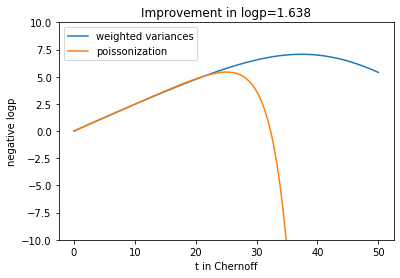

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### define experiment to compare bounds on missing mass concentration

def experiment(p,n,eps,ts,plot=False,assert_max_found=True):

    ### moment generating function of a Bernulii variable (centered)

    MGF_bern = lambda p,t: p*np.exp((1-p)*t) + (1-p)*np.exp((-p)*t)
    assert MGF_bern(0.7,0) == 1

    ### moment generating function of missing mass (centered)

    q = lambda p,n: (1-p)**n
    MGF_mass = lambda p,t: MGF_bern(q(p,n),t*p**2)
    log_MGF_mass_bound1 = lambda p,t: p.shape[0] * np.log( 1+ (MGF_mass(p,t)-1).mean(0) )

    ### chernoff's inequality / Legendre's dual

    duals1 = - log_MGF_mass_bound1(p,ts) + eps * ts
    max1 = duals1.max()
    
    if assert_max_found:
        assert max1 > duals1[-1]

    ### poisson occupancy bound for centered missing mass

    bennet = lambda x: np.exp(x)-1-x
    log_MGF_mass_bound2 = lambda p,t: (np.exp(-p*n)*bennet(p*t)).sum(0) / t**2

    duals2 = - log_MGF_mass_bound2(p,ts) + eps * ts
    max2 = duals2.max()

    if assert_max_found:
        assert max2 > duals2[-1]

    if plot:
        plt.plot(ts,duals1,label='weighted variances')
        plt.plot(ts,duals2,label='poissonization')
        plt.legend()
        plt.xlabel('t in Chernoff')
        plt.ylabel('negative logp')        
        plt.title('Improvement in logp={:.3f}'.format(max1-max2))
        plt.ylim(bottom=-10,top=10)
        
    return max1 - max2

### look at one example

p = [0.1,0.2,0.3,0.4]
p = np.array(p).reshape(-1,1)
n = 10
eps = 0.25
ts = np.linspace(1e-2,50,100)

assert p.sum() == 1

_ = experiment(p,n,eps,ts,plot=True)

In [4]:
# bigger experiment

np.random.seed(666)

m = 50
n = 25
eps = 0.1

ps = np.random.dirichlet(alpha=0.1*np.ones(m),size=100)
ts = np.linspace(1e-2,30*n,1000)

gains = []
masses = []
for p in ps:
    np.testing.assert_almost_equal(1,p.sum())
    masses.append(p.dot((1-p)**n))
    p = np.expand_dims(p,-1)
    gain = experiment(p,n,eps,ts)
    gains.append(gain)

gains = np.array(gains)
masses = np.array(masses)
print(gains.mean(),2*gains.std())
print(masses.mean()) 

4.8475692534027415 4.113497642082809
0.13828589922847312
